   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
  

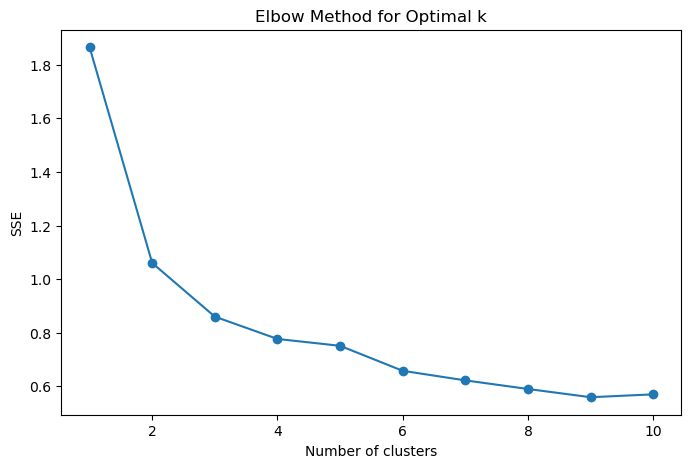

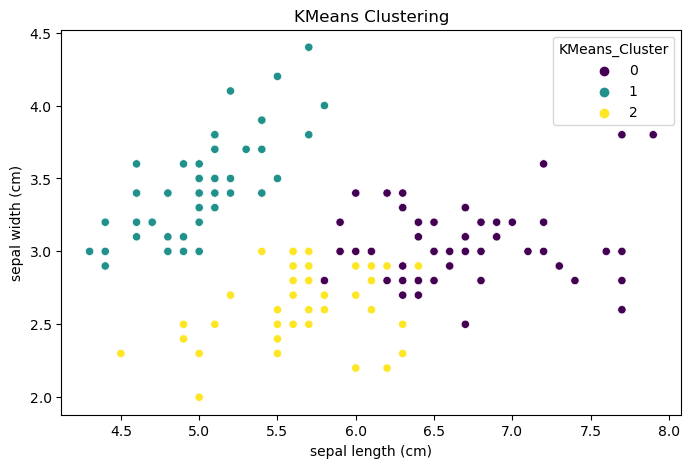

Silhouette Score for KMeans: 0.4565352255831263


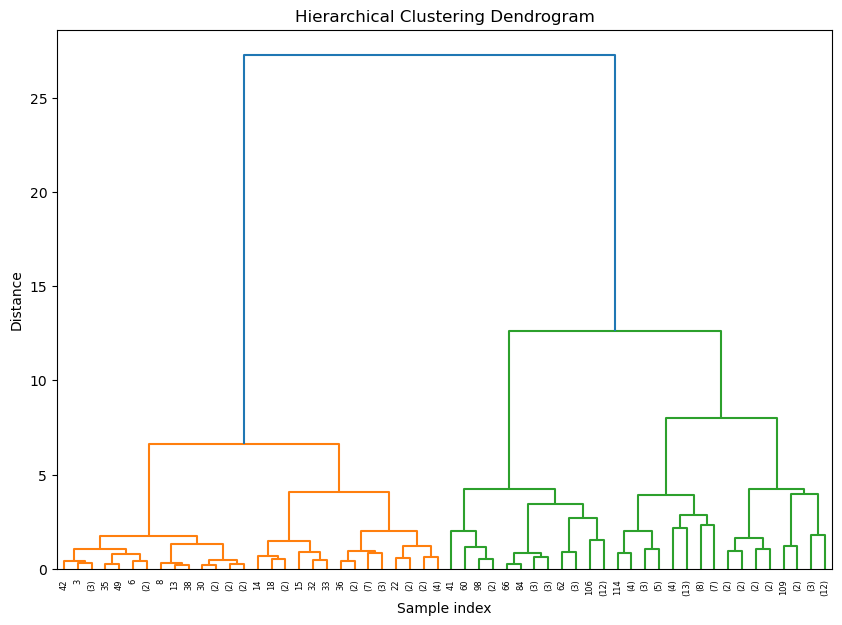

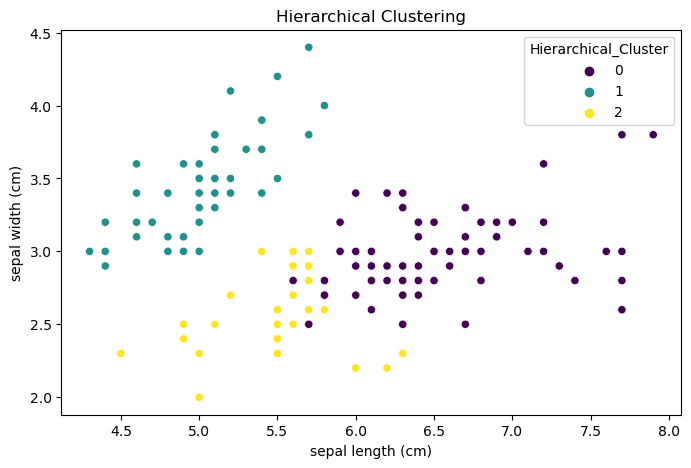

Silhouette Score for Hierarchical Clustering: 0.4466890410285909
Hierarchical_Cluster   0   1   2
KMeans_Cluster                  
0                     55   0   0
1                      0  49   0
2                     16   0  30


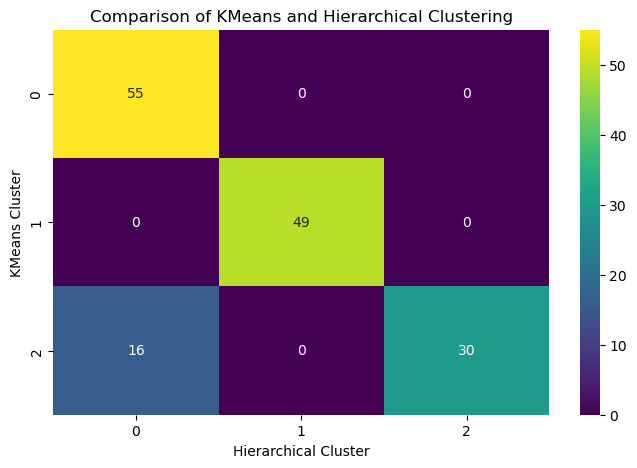

Adjusted Rand Index for KMeans: 0.645147003482001
Adjusted Rand Index for Hierarchical Clustering: 0.6153229932145449


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.vq import kmeans2, vq
from scipy.spatial.distance import cdist

# Load the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first few rows of the dataframe
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert back to DataFrame for convenience
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df.head())

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    centroids, labels = kmeans2(scaled_df, k, iter=20, minit='points')
    sse.append(sum(np.min(cdist(scaled_df, centroids, 'euclidean'), axis=1)) / scaled_df.shape[0])

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit KMeans with the optimal number of clusters
optimal_k = 3  # Adjust based on the elbow method
centroids, kmeans_labels = kmeans2(scaled_df, optimal_k, iter=20, minit='points')

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='KMeans_Cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.show()

# Evaluate the clustering
silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

# Compute the linkage matrix
Z = linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Fit AgglomerativeClustering with the optimal number of clusters
agg_clust = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = agg_clust.fit_predict(scaled_df)

# Add the hierarchical cluster labels to the original dataframe
df['Hierarchical_Cluster'] = hierarchical_labels

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Evaluate the clustering
silhouette_avg = silhouette_score(scaled_df, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg}')

# Compare the clustering results
comparison = pd.crosstab(df['KMeans_Cluster'], df['Hierarchical_Cluster'])
print(comparison)

# Visualize the comparison
plt.figure(figsize=(8, 5))
sns.heatmap(comparison, annot=True, cmap='viridis')
plt.title('Comparison of KMeans and Hierarchical Clustering')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('KMeans Cluster')
plt.show()

# Evaluate clustering performance against ground truth
ground_truth = data.target
kmeans_ari = adjusted_rand_score(ground_truth, kmeans_labels)
hierarchical_ari = adjusted_rand_score(ground_truth, hierarchical_labels)

print(f'Adjusted Rand Index for KMeans: {kmeans_ari}')
print(f'Adjusted Rand Index for Hierarchical Clustering: {hierarchical_ari}')
